# Método del codo y coeficiente de silueta en clustering
## Con un set de datos a mano

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

Definimos un set de datos.

In [2]:
x = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
y = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x,y))).reshape(len(x), 2)

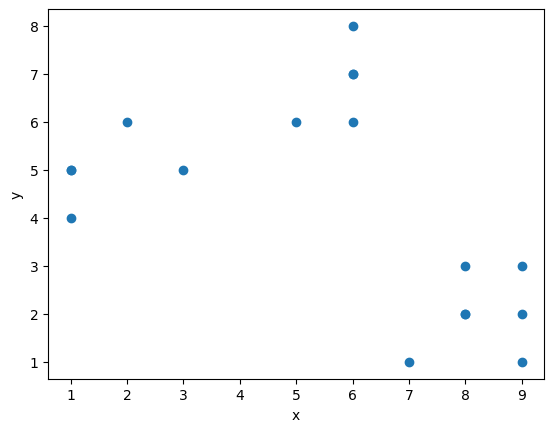

In [3]:
# Plot

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Podríamos ver 3 clusters hasta 5.

* Para k =  2  el promedio de la silueta es de : 0.6113424368705715
   - Para i =  1  la silueta del cluster vale :  0.49704450958269375
   - Para i =  2  la silueta del cluster vale :  0.7746251901389686


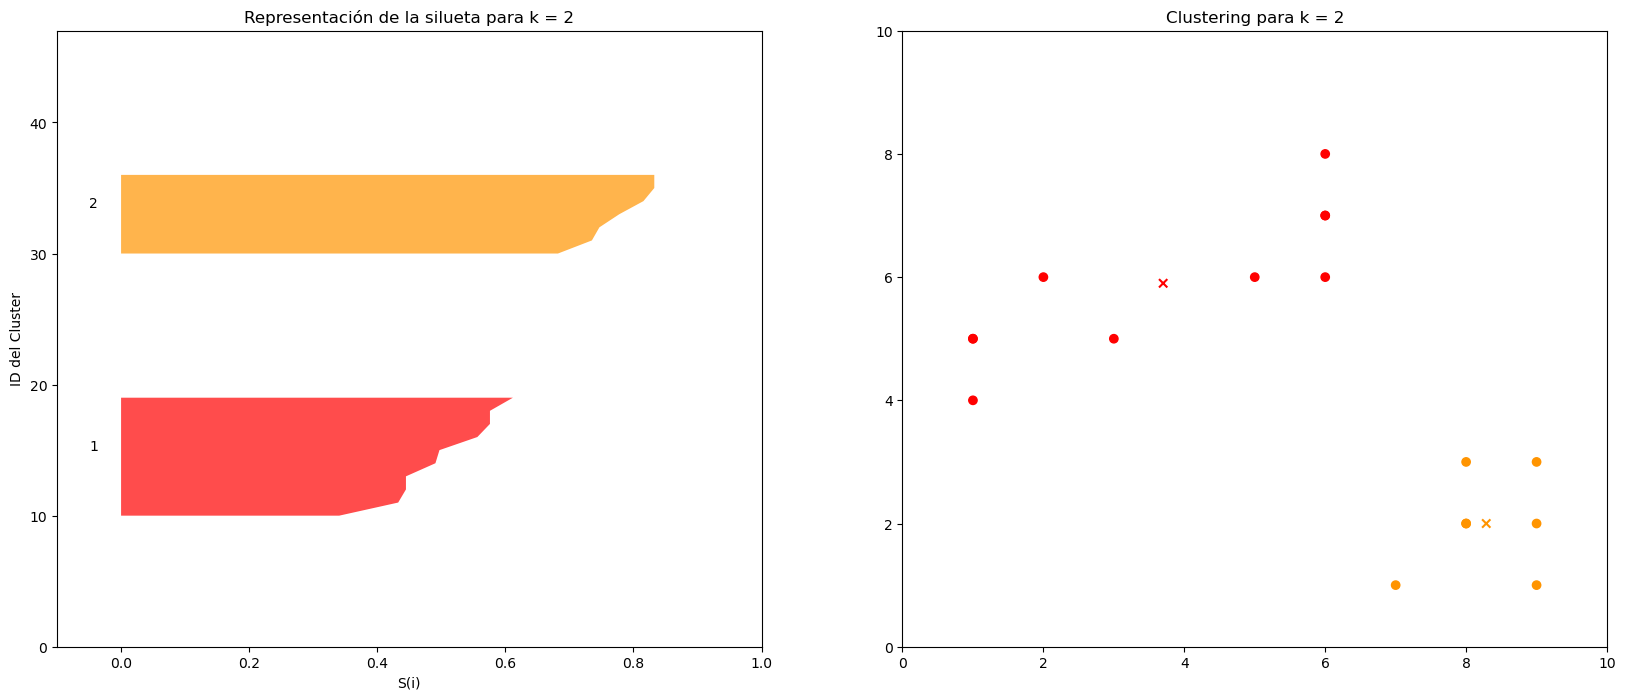

* Para k =  3  el promedio de la silueta es de : 0.7122079383287169
   - Para i =  1  la silueta del cluster vale :  0.7345257364682265
   - Para i =  2  la silueta del cluster vale :  0.6609508863896014
   - Para i =  3  la silueta del cluster vale :  0.7322200728725188


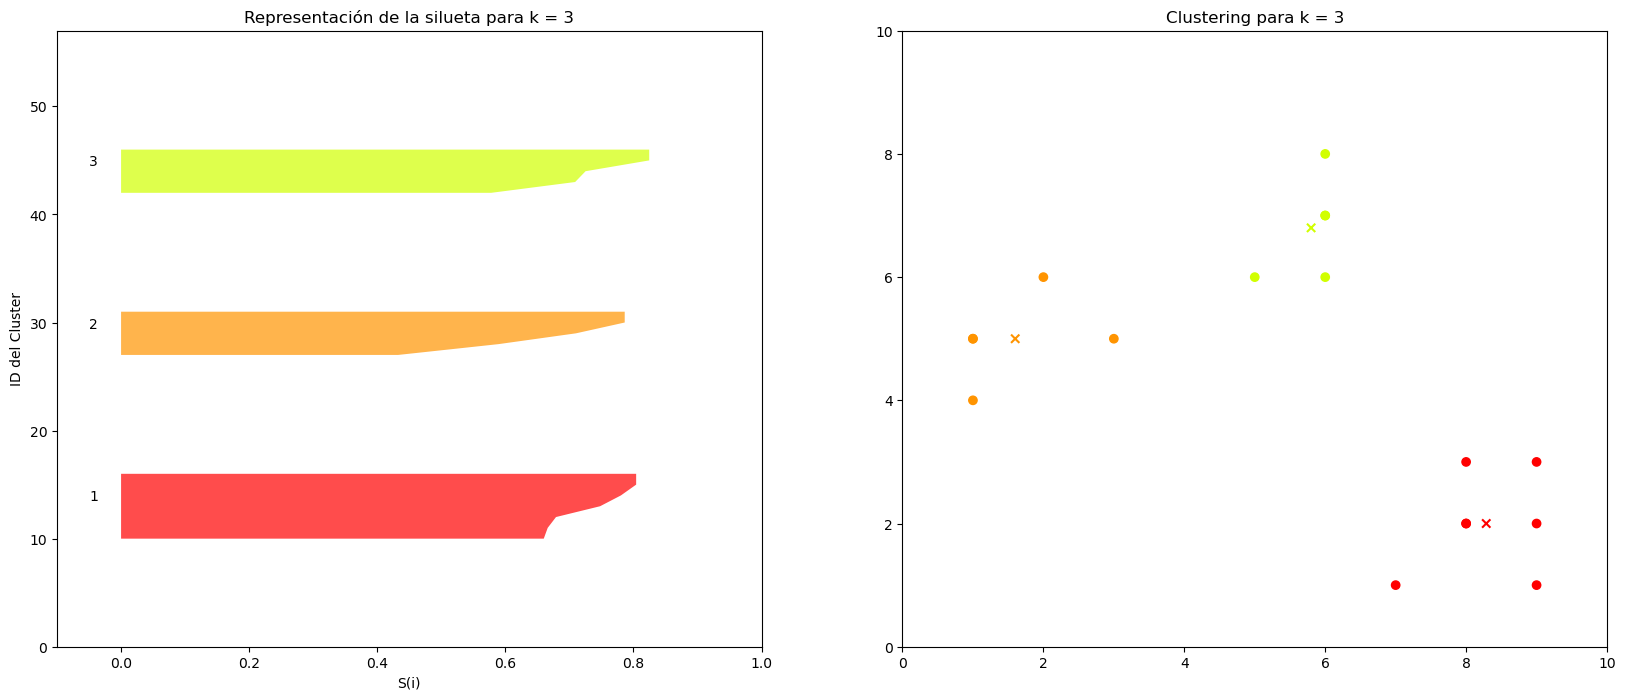

* Para k =  4  el promedio de la silueta es de : 0.5089316331408965
   - Para i =  1  la silueta del cluster vale :  0.39420804524336517
   - Para i =  2  la silueta del cluster vale :  0.6609508863896014
   - Para i =  3  la silueta del cluster vale :  0.7215423409231719
   - Para i =  4  la silueta del cluster vale :  0.19019110726892913


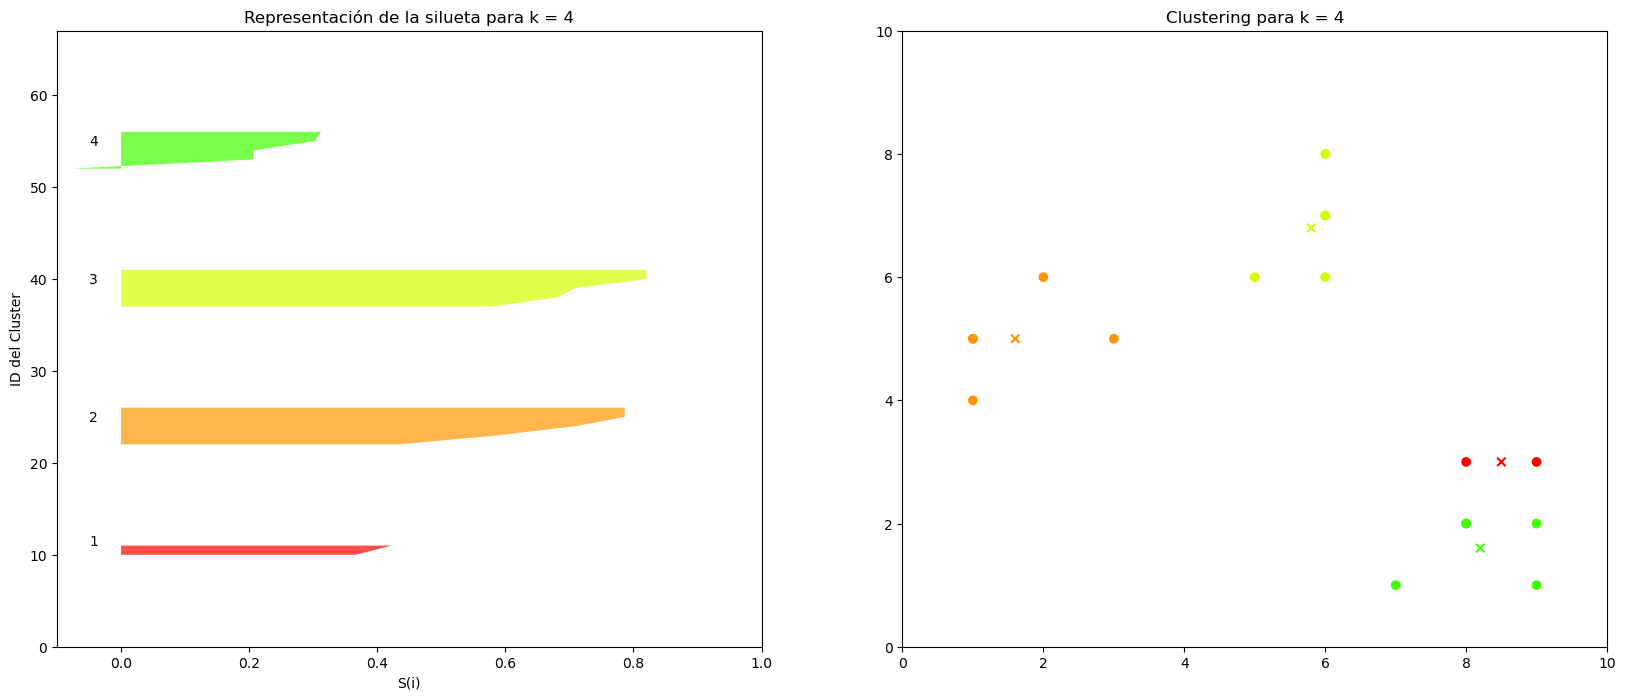

* Para k =  5  el promedio de la silueta es de : 0.46983374375750137
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.37765685097302226
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.655666655624379
   - Para i =  5  la silueta del cluster vale :  0.0


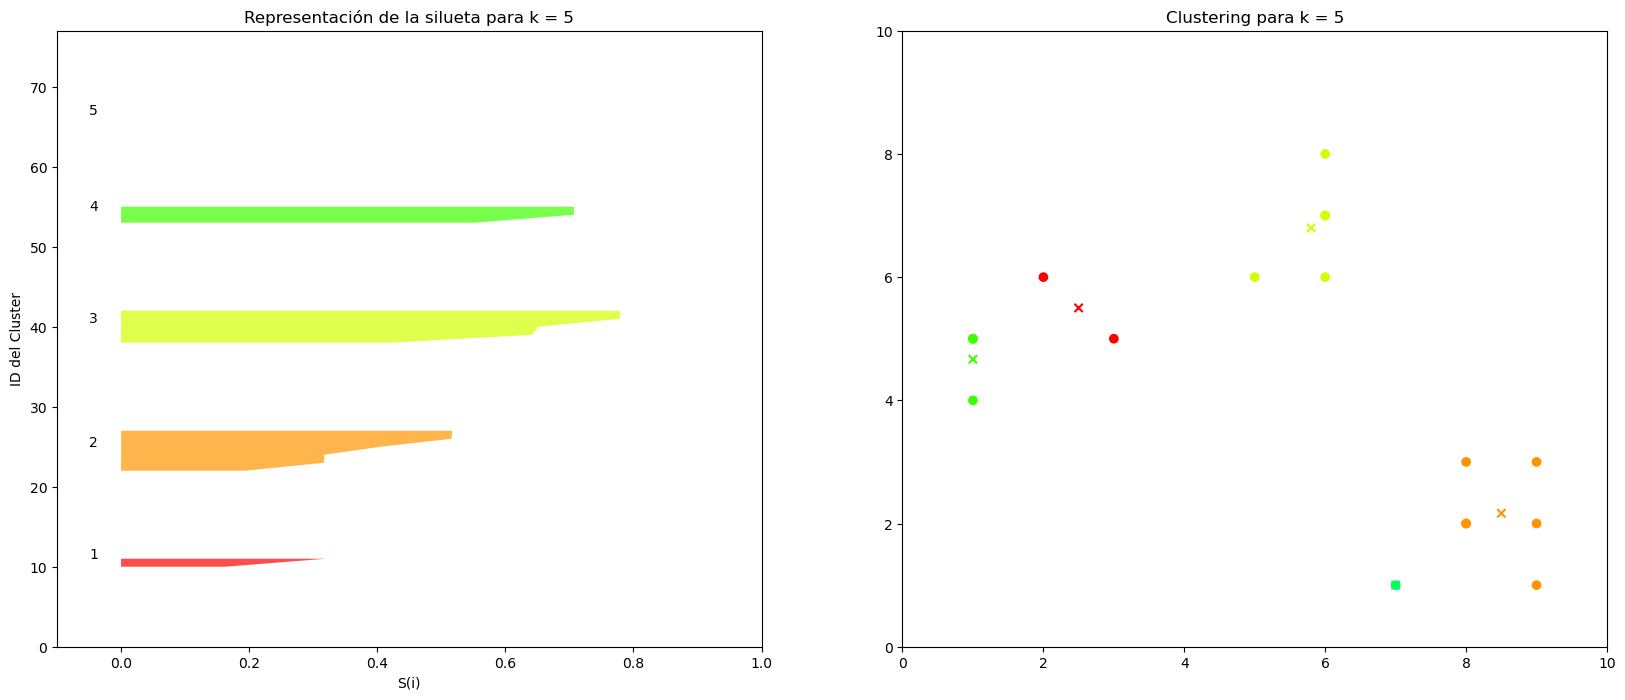

* Para k =  6  el promedio de la silueta es de : 0.36958173826691443
   - Para i =  1  la silueta del cluster vale :  0.0
   - Para i =  2  la silueta del cluster vale :  0.3503771888434877
   - Para i =  3  la silueta del cluster vale :  0.6171508129534257
   - Para i =  4  la silueta del cluster vale :  0.263812295212263
   - Para i =  5  la silueta del cluster vale :  0.31700053499298475
   - Para i =  6  la silueta del cluster vale :  0.0


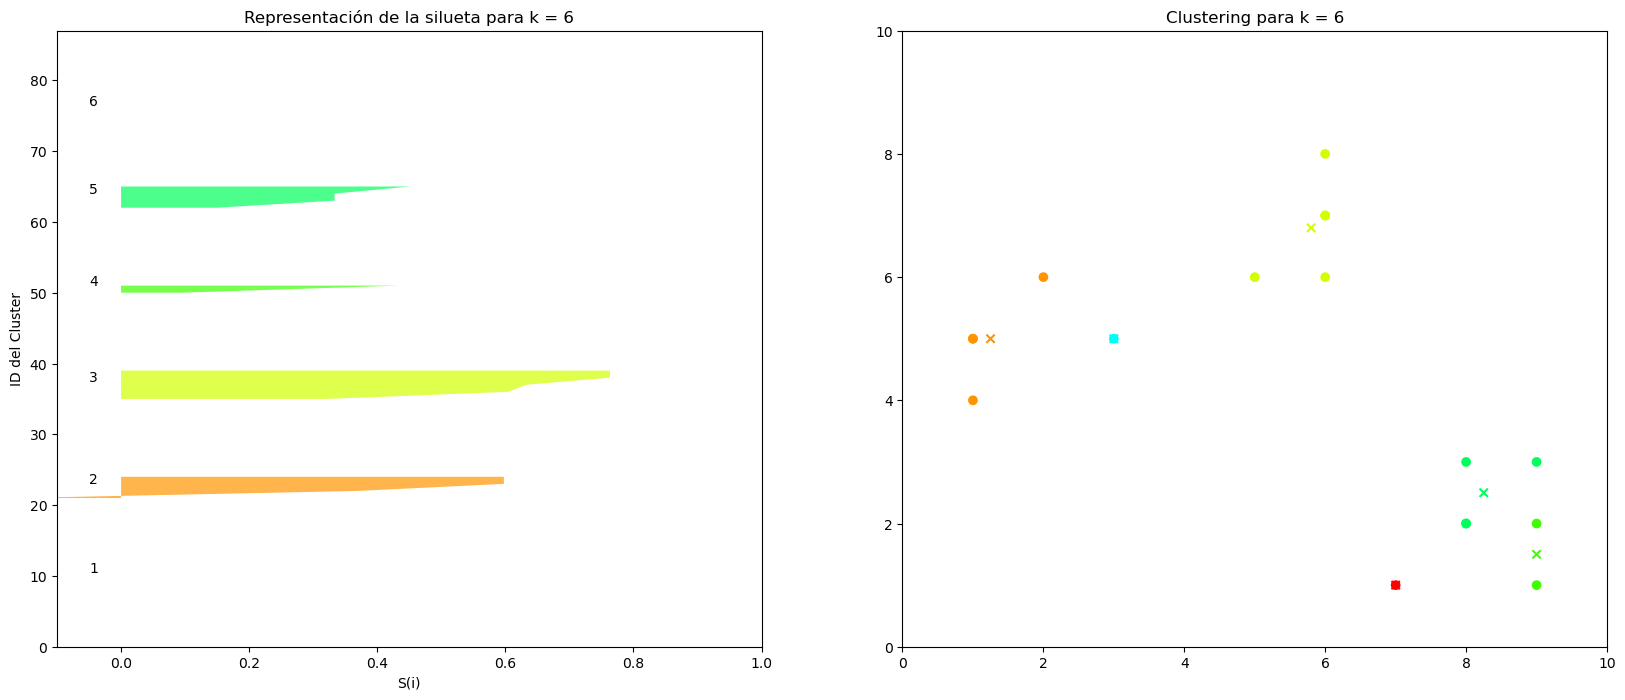

* Para k =  7  el promedio de la silueta es de : 0.427502451441798
   - Para i =  1  la silueta del cluster vale :  0.31256470041698214
   - Para i =  2  la silueta del cluster vale :  0.0
   - Para i =  3  la silueta del cluster vale :  0.6171508129534257
   - Para i =  4  la silueta del cluster vale :  0.6152265411044983
   - Para i =  5  la silueta del cluster vale :  0.2751262658470836
   - Para i =  6  la silueta del cluster vale :  0.3869086846339371
   - Para i =  7  la silueta del cluster vale :  0.0


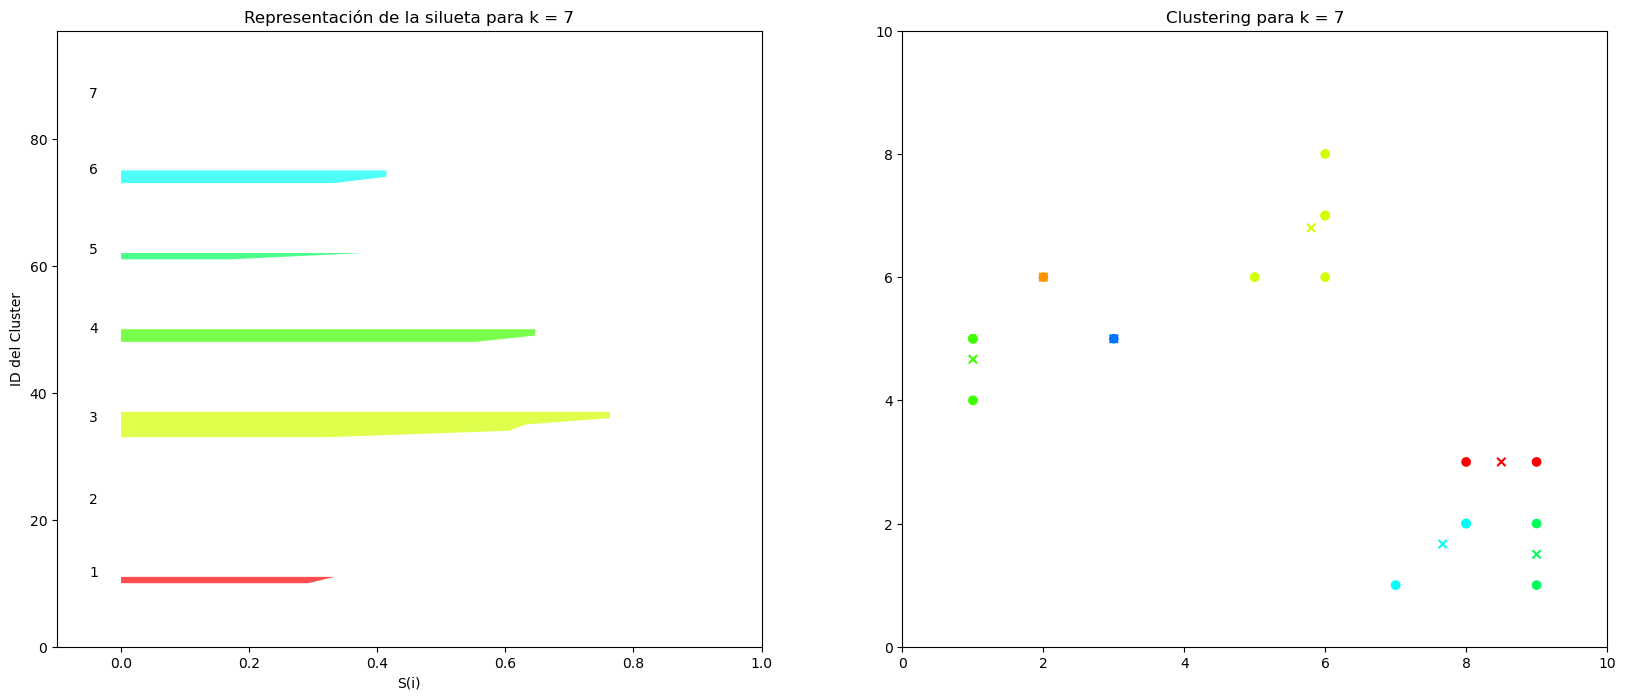

* Para k =  8  el promedio de la silueta es de : 0.26464346361037333
   - Para i =  1  la silueta del cluster vale :  0.0
   - Para i =  2  la silueta del cluster vale :  0.5664789734180768
   - Para i =  3  la silueta del cluster vale :  0.6152265411044983
   - Para i =  4  la silueta del cluster vale :  0.05923629701100437
   - Para i =  5  la silueta del cluster vale :  0.0
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.32882042637679976
   - Para i =  8  la silueta del cluster vale :  0.0


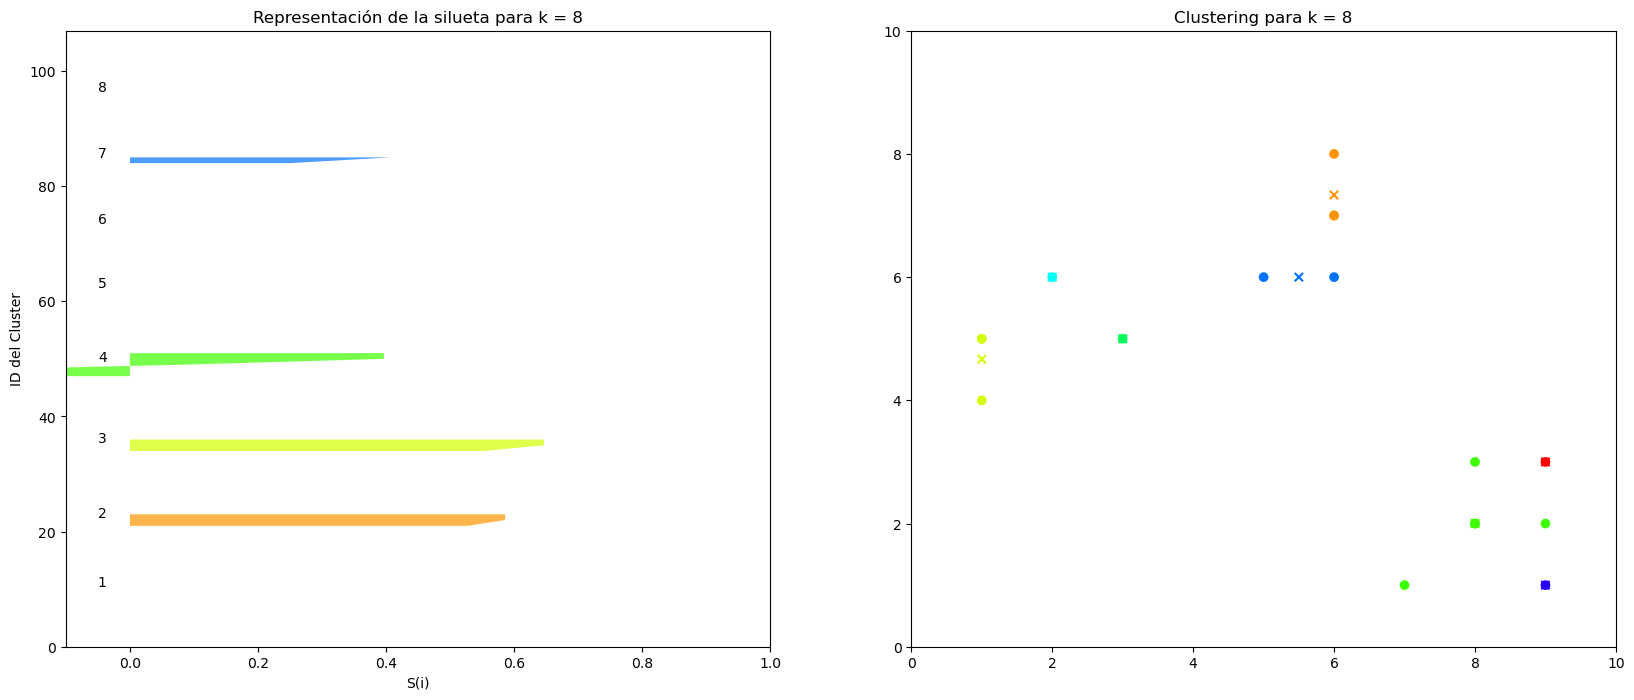

* Para k =  9  el promedio de la silueta es de : 0.2941464102218948
   - Para i =  1  la silueta del cluster vale :  0.5
   - Para i =  2  la silueta del cluster vale :  0.5237553814972481
   - Para i =  3  la silueta del cluster vale :  0.6152265411044983
   - Para i =  4  la silueta del cluster vale :  0.0
   - Para i =  5  la silueta del cluster vale :  0.027847735322324364
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0
   - Para i =  9  la silueta del cluster vale :  0.0


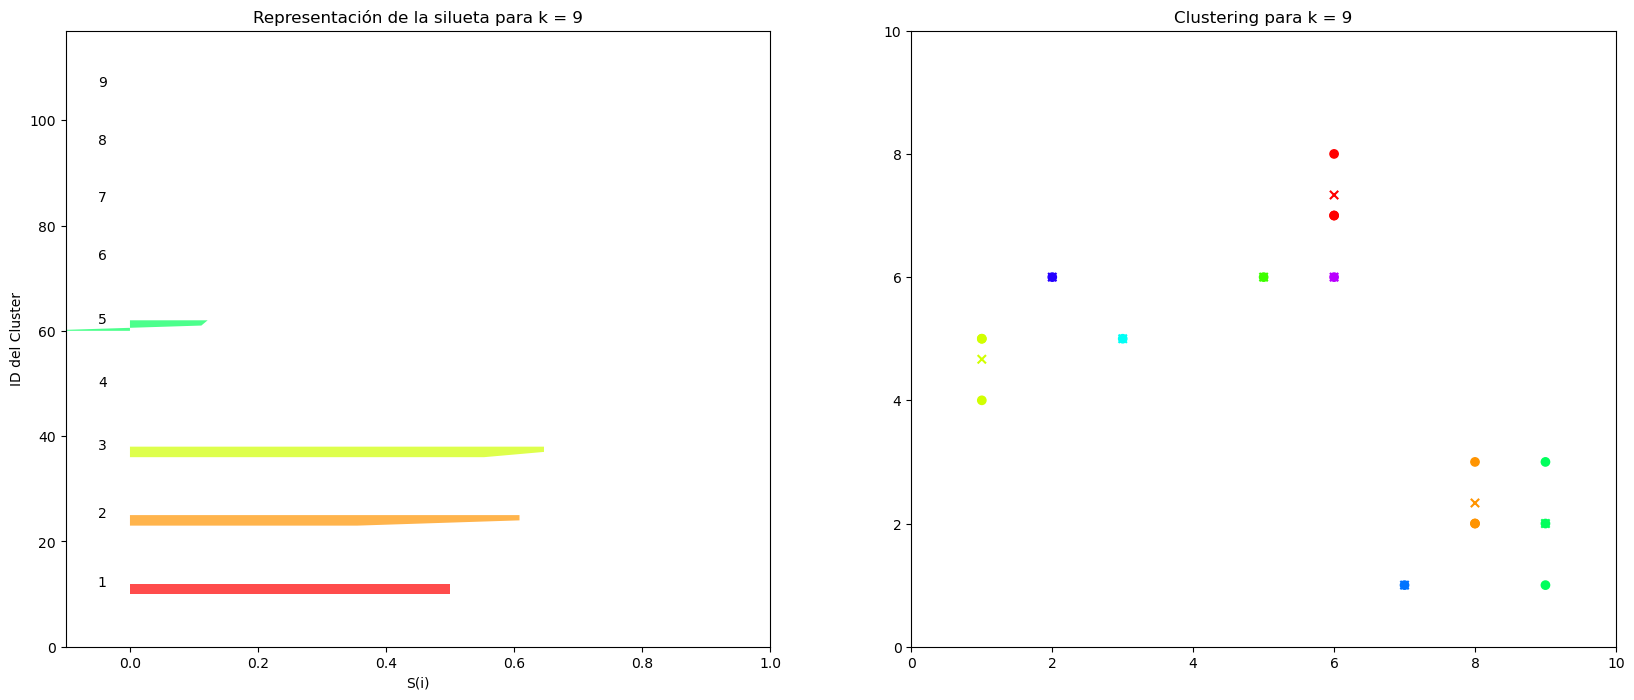

In [4]:
# maximo número de iteraciones que se llevarán a cabo
max_k = 10

# lista de índices de la iteracion
K = range(2,max_k)

# lista para guardar la suma de cuadrados
ssw = []

# Espectro de colores para ponerle a los gráficos
color_palette = [plt.get_cmap('hsv')(float(i)/max_k) for i in range(0,len(K)+1)]

# Centroides (general para todo el dataset)
centroid = [sum(X)/len(X) for i in K]

# Suma de los cuadrados, totales
# Toma en cuenta la distancia del punto al centroide
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

# Ahora se hace kmeans para cada número k (numero de clusters)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X) ## Se hace el clustering k means
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_) ## se guardan los centroides de cada cluster como dataframe
    labels = kmeanModel.labels_ ## se guarda el numero de cluster asignado
    
    # hay un valor de labels por cada punto del dataset
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) # suma de cuadrados punto a centroide
    ssw.append(ssw_k) # Se añade a la lista original
    
    # color para cada una de los clusters
    label_color = [color_palette[i] for i in labels]
    
    if 1<k<len(X): ## por si acaso el número de clusters supera el numero de datos
        fig, (ax1, ax2) = plt.subplots(1,2) # crear plot de una fila y dos columnas
        fig.set_size_inches(20,8)
        
        ax1.set_xlim([-0.1, 1.0]) # los coeficientes de silueta van entre 0 y 1
        
        ax1.set_ylim([0, len(X)+ (k+1)*10]) # el numero de clusters determina el tamaño de cada barra mostrada
        # (k+1)*10 será la longitud del espacio en blanco que se deja por barra
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster número i
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster número i
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            ax1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        ax1.set_title("Representación de la silueta para k = %s"%str(k))
        ax1.set_xlabel("S(i)")
        ax1.set_ylabel("ID del Cluster")
        
    ##Plot de los k-means con sus puntos asignados
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x,y, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette[0:k], marker = "x")
    plt.show()
        

Buscamos que el coeficiente de la silueta sea lo más homogéneo entre clusters, que no sean tan diferentes.

In [13]:
color_palette

[(1.0, 0.0, 0.0, 1.0),
 (1.0, 0.5790446966917554, 0.0, 1.0),
 (0.8187488187488188, 1.0, 0.0, 1.0),
 (0.23970412205706326, 1.0, 0.0, 1.0),
 (0.0, 1.0, 0.3625004724974957, 1.0),
 (0.0, 1.0, 0.9647031631761764, 1.0),
 (0.0, 0.4562523625023627, 1.0, 1.0),
 (0.14595412205706287, 0.0, 1.0, 1.0),
 (0.724998818748819, 0.0, 1.0, 1.0)]

## Método del codo

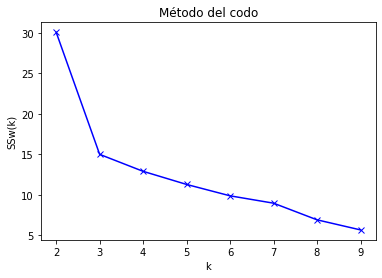

In [85]:
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("Método del codo")
plt.show()

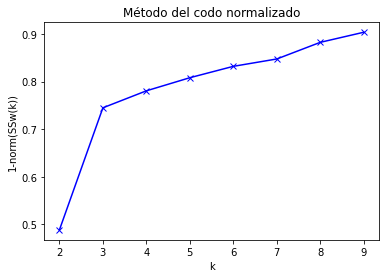

In [90]:
# Codo normalizado
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("Método del codo normalizado")
plt.show()